# First and foremost, create the environment.

# Import Libraries

In [ ]:
# Importing libraries
import pandas as pd
# import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
# Prevent warnings from appearing
warnings.filterwarnings('ignore')

# Functions

In [3]:
# Function to fill up all the Null Values
def fill_null(data, columns):
    for i in columns:
        if i == "Lot Frontage":
            data[i] = data[i]
        elif data[i].dtypes == object:
            data[i].fillna("NA", inplace=True)
        else:
            data[i].fillna(0, inplace=True)

In [4]:
# Function to identify Multicollinearity
def topcorr(model):
    for i in model.columns:
        for j in model.columns:
            if i != j:
                corr = model[i].corr(model[j])
                if corr > 0.7:
                    print('{} and {} corr = {}'.format(i,j,corr))

In [5]:
# # Function to create Basic Data Dictionary
# def data_dictionary(data):
#     for i in data:
#         print("|" + str(i) + '|' + str(data[i].dtypes) + '|' + "train" + '| |')

In [6]:
# Function to rename Columns
def rename(x):
    if x == x.lower():
        return x
    else:
        try:
            x = x.replace(" ", "_").lower()
            return x
        except:
            return x

<a id='Import'></a>
# 1) Import Train Data

In [7]:
train = pd.read_csv('./datasets/train.csv', dtype={'MS SubClass': object, "PID": object, "Overall Qual": object, "Overall Cond": object})


In [ ]:
# informational 
print(train.shape)
print(test.shape)

In [ ]:
#train.set_index('Id', inplace=True)

In [8]:
# preview of train dataset
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [9]:
#looking for errors
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null object
MS SubClass        2051 non-null object
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null object
Overall Cond       2051 non-null object
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style       

In [10]:
train.describe()

,Id,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,69.055200,10065.208191,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,23.260653,6742.488909,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,58.000000,7500.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,68.000000,9430.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,80.000000,11513.500000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,313.000000,159000.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


# Inspect and proceed with Data Cleaning..

Columns with null might be referred as ie: "na" or "none.  A feature might actually be better represented by "0" or "na" rather than NULL or NaN. There's a difference between NULL (unknown value as it is not a number), and "NA" (not available). 

For example, in 'Garage Type', there is a distinct different between 'There is no garage' or 'There is no data available'.

In [11]:
# Identify all columns with Null Values
train.isnull().sum().sort_values(ascending = False).head(26)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Cond        114
Garage Qual        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
Total Bsmt SF        1
BsmtFin SF 1         1
dtype: int64

Data description for proper value representation!

Nulls for respective columns will be filled by imputation.

Using domain knowledge to select an appropriate value.

In [ ]:
# # data dictionary of ordinal categorical data
# lot_shape_dict = {'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1}
# train['Lot Shape'] = train['Lot Shape'].map(lot_shape_dict)
# utilities_dict = {'AllPub':4,'NoSewr':3, 'NoSeWa':2, 'ELO':1}
# train['Utilities'] = train['Utilities'].map(utilities_dict)
# land_slope_dict = {'Gtl':3, 'Mod':2, 'Sev':1}
# train['Land Slope'] = train['Land Slope'].map(land_slope_dict)
# exter_qual_dict = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1}
# train['Exter Qual'] = train['Exter Qual'].map(exter_qual_dict)
# exter_cond_dict = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1}
# train['Exter Cond'] = train['Exter Cond'].map(exter_cond_dict)
# bsmt_qual_dict = {'Ex':6, 'Gd':5, 'TA':4,'Fa':3, 'Po':2, 'NA':1}
# train['Bsmt Qual'] = train['Bsmt Qual'].map(bsmt_qual_dict)
# bsmt_cond_dict = {'Ex':6, 'Gd':5, 'TA':4,'Fa':3, 'Po':2, 'NA':1}
# train['Bsmt Cond'] = train['Bsmt Cond'].map(bsmt_qual_dict)
# bsmt_expo_dict = {'Gd':5, 'Av':4,'Mn':3,'No':2, 'NA':1}
# train['Bsmt Exposure'] = train['Bsmt Exposure'].map(bsmt_expo_dict)
# bsmt_fin1_dict = {'GLQ':7, 'ALQ':6, 'BLQ':5,'Rec':4, 'LwQ':3, 'Unf':2, 'NA':1}
# train['BsmtFin Type 1'] = train['BsmtFin Type 1'].map(bsmt_fin1_dict)
# bsmt_fin2_dict = {'GLQ':7, 'ALQ':6, 'BLQ':5,'Rec':4, 'LwQ':3, 'Unf':2, 'NA':1}
# train['BsmtFin Type 2'] = train['BsmtFin Type 2'].map(bsmt_fin2_dict)
# heatingqc_dict = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1}
# train['Heating QC'] = train['Heating QC'].map(heatingqc_dict)
# electrical_dict = {'SBrkr':5, 'FuseA':4, 'FuseF':3,'FuseP':2, 'Mix':1}
# train['Electrical'] = train['Electrical'].map(electrical_dict)
# kitchenqual_dict = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1}
# train['Kitchen Qual'] = train['Kitchen Qual'].map(kitchenqual_dict)
# functional_dict = {'Typ':8, 'Min1':7, 'Min2':6,'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1}
# train['Functional'] = train['Functional'].map(functional_dict)
# fireplacequ_dict = {'Ex':6, 'Gd':5, 'TA':4,'Fa':3, 'Po':2, 'NA':1}
# train['Fireplace Qu'] = train['Fireplace Qu'].map(fireplacequ_dict)
# garage_fin_dict = {'Fin':4, 'RFn':3, 'Unf':2, 'NA':1}
# train['Garage Finish'] = train['Garage Finish'].map(garage_fin_dict)
# garage_qual_dict = {'Ex':6, 'Gd':5, 'TA':4,'Fa':3, 'Po':2, 'NA':1}
# train['Garage Qual'] = train['Garage Qual'].map(garage_qual_dict)
# garage_cond_dict = {'Ex':6, 'Gd':5, 'TA':4,'Fa':3, 'Po':2, 'NA':1}
# train['Garage Cond'] = train['Garage Cond'].map(garage_cond_dict)
# paved_drive_dict = {'Y':3, 'P':2,'N':1}
# train['Paved Drive'] = train['Paved Drive'].map(paved_drive_dict)
# poolqc_dict = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1}
# train['Pool QC'] = train['Pool QC'].map(poolqc_dict)
# fence_dict = {'GdPrv':5, 'MnPrv':4, 'GdWo':3, 'MnWw':2, 'NA':1}
# train['Fence'] = train['Fence'].map(fence_dict)


In [ ]:
# # to fill up the NaN values of those ordinal categorial variables
# train['Pool QC'].fillna(value=0,inplace=True)
# train['Fireplace Qu'].fillna(value=0,inplace=True)
# train['Fence'].fillna(value=0,inplace=True)
# train['Garage Finish'].fillna(value=0,inplace=True)
# train['Garage Qual'].fillna(value=0,inplace=True)
# train['Garage Cond'].fillna(value=0,inplace=True)
# train['Bsmt Qual'].fillna(value=0,inplace=True)
# train['Bsmt Cond'].fillna(value=0,inplace=True)
# train['Bsmt Exposure'].fillna(value=0,inplace=True)
# train['BsmtFin Type 1'].fillna(value=0,inplace=True)
# train['BsmtFin Type 2'].fillna(value=0,inplace=True)

<a id='hugenull'></a>
### 2.2) Indentify Variables with huge Null Values 

In [12]:
# Create where variable that has too many null values against sale price
train_null_val = train[['SalePrice', 'Misc Feature', 'Fence', 'Pool QC', 'Alley']]
train_null_val.head()

,SalePrice,Misc Feature,Fence,Pool QC,Alley
0,130500,NaN,NaN,NaN,NaN
1,220000,NaN,NaN,NaN,NaN
2,109000,NaN,NaN,NaN,NaN
3,174000,NaN,NaN,NaN,NaN
4,138500,NaN,NaN,NaN,NaN


In [13]:
train_null_val = train_null_val.fillna("NA")

In [14]:
# Change columns to get_dummies
train_null_dummies = pd.get_dummies(train_null_val)
train_null_dummies.head()

,SalePrice,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_NA,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,Pool QC_Ex,Pool QC_Fa,Pool QC_Gd,Pool QC_NA,Pool QC_TA,Alley_Grvl,Alley_NA,Alley_Pave
0,130500,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1,220000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,109000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
3,174000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,138500,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0


Text(0.5, 1.0, 'Heatmap for Categorical Null Variables')

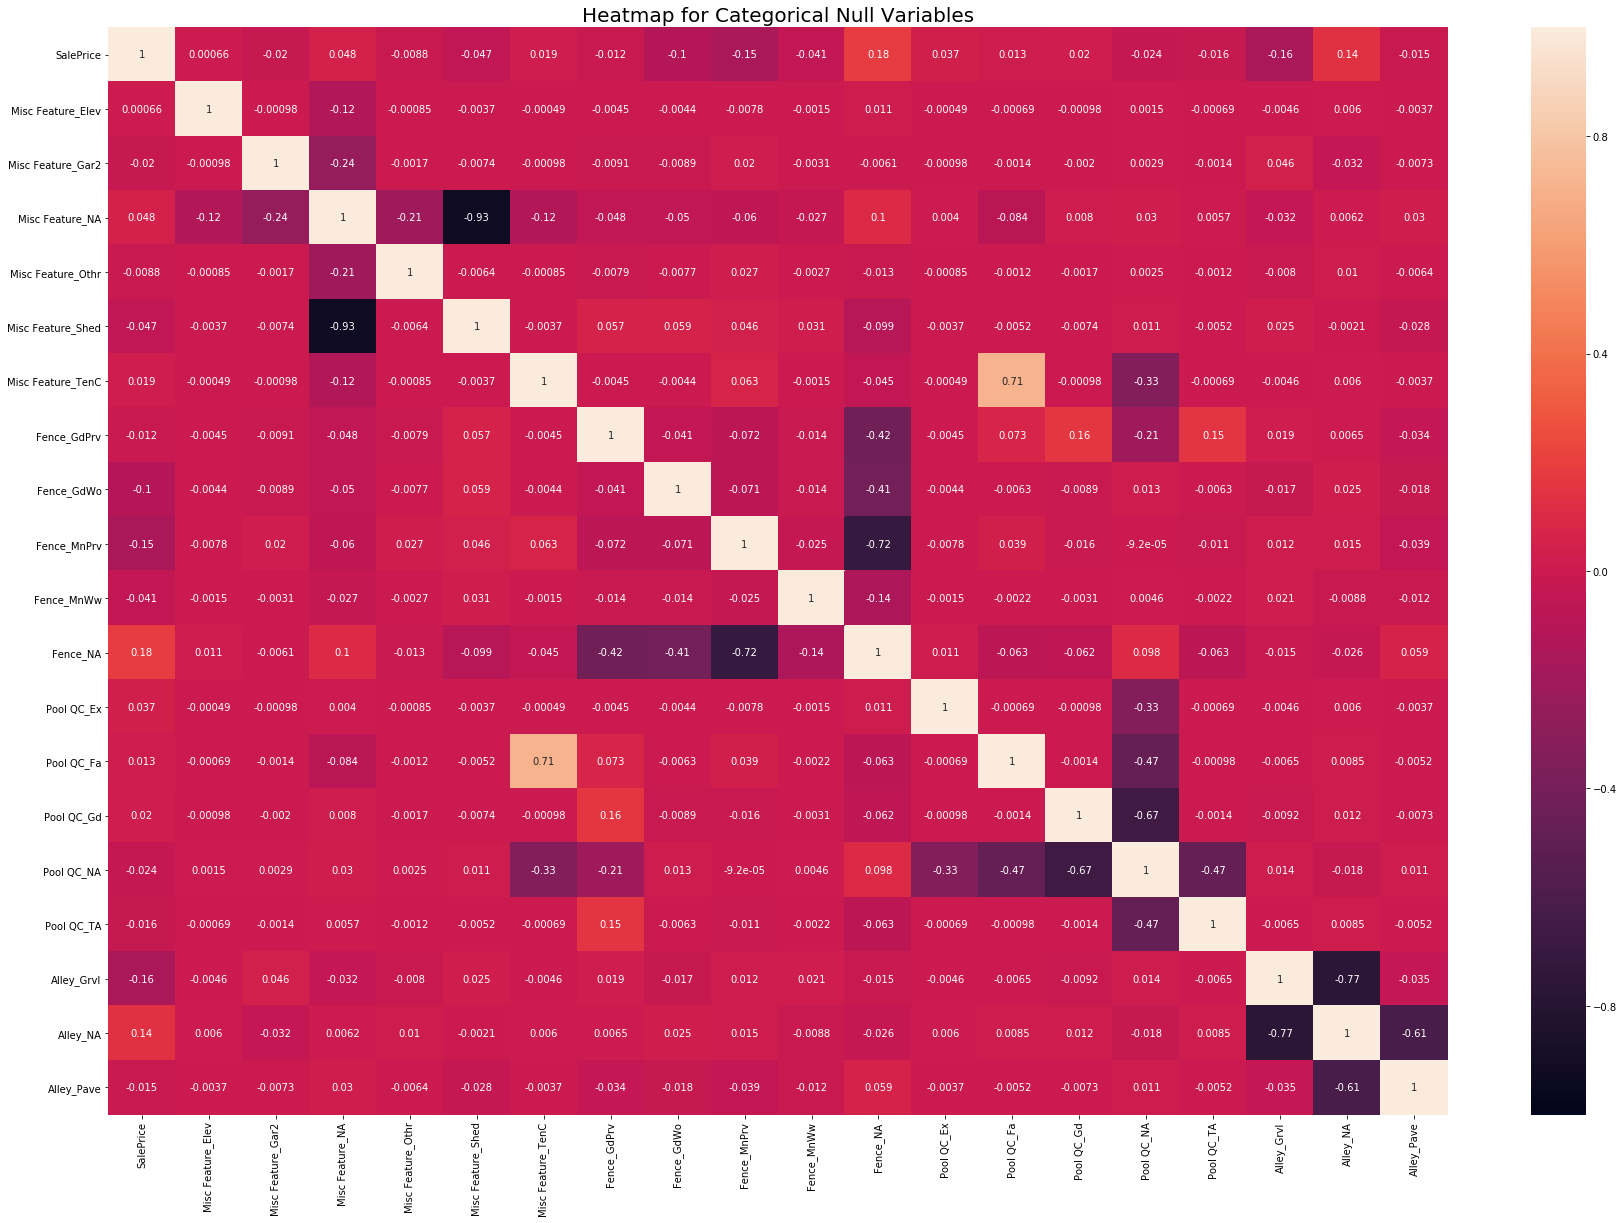

In [15]:
# Check if null Values are correlated with price
plt.figure(figsize=(30,20))
sns.heatmap(train_null_dummies.corr(), vmin= -1,annot=True)
plt.title('Heatmap for Categorical Null Variables', fontsize = 20)

Based on the Heatmap, there is very little correlation between the dummy variables to SalePrice. Hence we shall drop all the columns.

In [16]:
# Drop Misc Feature, Fence, Pool QC, Alley for having too many null values and are not correlated with sales price
train = train.drop( axis = 1, columns = train[['Misc Feature', 'Fence', 'Pool QC', 'Alley']])

In [17]:
# Rename Columns
train = train.rename(columns = lambda x : rename(x))

In [18]:
# Looking for outliers
train_liv_area = train[['saleprice', 'gr_liv_area']]
train_liv_area.head()


,saleprice,gr_liv_area
0,130500,1479
1,220000,2122
2,109000,1057
3,174000,1444
4,138500,1445


Text(0.5, 1.0, 'gr_liv_area vs saleprice')

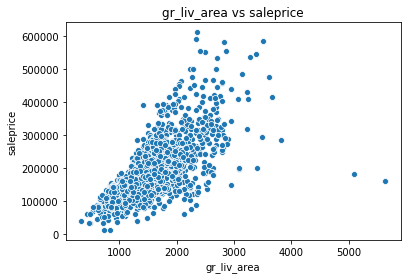

In [19]:
# Scatterplot of Gr Liv Area Against Sales Price
sns.scatterplot(x = train_liv_area['gr_liv_area'], y = train_liv_area['saleprice'])
plt.title("gr_liv_area vs saleprice")
plt.savefig('./images/outlierplot.png')

In [ ]:
train.SalePrice.plot.hist(bins=20)
plt.axvline(lower_bound, color = 'r', label = 'lower bound')
plt.axvline(upper_bound, color = 'g', label = 'upper bound')
plt.legend()
plt.show()
plt.savefig('./images/outlier1.png', facecolor= '#404040')

Compared to the 1.5 * IQR, the 3 * the IQR cuts a lot of the data. The outliers are primarily in the upper tail. This is a positively skewed distribution so outliers will be the high-priced homes.

There are 2 outliers in the scatterplot, it will affect the regression so we should identify them and drop the rows.

In [20]:
# remove houses with more than 4000 sq
train = train[(train['gr_liv_area'] < 4000)]
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,...,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,...,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,...,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,...,59,0,0,0,0,0,3,2010,WD,138500


Neighbourhood Locations (alphabetical): 

Blmngtn    Bloomington Heights

Blueste    Bluestem

BrDale    Briardale

BrkSide    Brookside

ClearCr    Clear Creek

CollgCr    College Creek

Crawfor    Crawford

Edwards    Edwards

Gilbert    Gilbert

IDOTRR    Iowa DOT and Rail Road

MeadowV    Meadow Village

Mitchel    Mitchell

Names    North Ames

NoRidge    Northridge

NPkVill    Northpark Villa

NridgHt    Northridge Heights

NWAmes    Northwest Ames

OldTown    Old Town

SWISU    South & West of Iowa State University

Sawyer    Sawyer

SawyerW    Sawyer West

Somerst    Somerset

StoneBr    Stone Brook

Timber    Timberland

Veenker    Veenker

This would be one of the important predictors of SalePrice considering that location is a crucial factor when purchasing real estate! Expect to see differing SalePrice in different neighbourhoods.

In [ ]:
print(train[['SalePrice']].mean())
nbh_sp = (train.groupby('Neighborhood')['SalePrice'].mean()).sort_values(ascending=False)
nbh_sp
# list of neighbourhoods that fetch a higher than average SalePrice: StoneBr, NridgHt, NoRidge, GrnHill, Veenker, Timber, Somerst,ClearCr, Crawfor, CollgCr, Blmngtn, NWAmes, Gilbert, Greens, SawyerW


In [39]:
# setting an ordered list of neighbourhoods
orderlist_nbh = list(train.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).index)

In [40]:
# look at the top 3 and worst 3 neighbourhoods
print('top 3 neighborhoods: ' + str())
print('mean price for 3 best neighborhoods: ' + str(train_updated[train_updated['Neighborhood'].isin(orderlist_nbh[:3])]['SalePrice'].mean()))
#print('\n')
print('mean price for 3 worst neighborhoods: ' + str(train_updated[train_updated['Neighborhood'].isin(orderlist_nbh[-3:])]['SalePrice'].mean()))


top 3 neighborhoods: 
mean price for 3 best neighborhoods: 322573.1778846154
mean price for 3 worst neighborhoods: 101301.07142857143


In [ ]:
print(train[['SalePrice']].mean())
C1_sp = (train.groupby('Condition 1')['SalePrice'].mean()).sort_values(ascending=False)
C1_sp
# after analysis, it seems that houses with proximity to the East-West railroad is not booming.  


In [ ]:
print(train[['SalePrice']].mean())
f_sp = (train.groupby('Foundation')['SalePrice'].mean()).sort_values(ascending=False)
f_sp
# only houses that has poured contrete

In [ ]:
print(train[['SalePrice']].mean())
gt_sp = (train.groupby('Garage Type')['SalePrice'].mean()).sort_values(ascending=False)
gt_sp
# having garage that is connected to the house are preferred

In [ ]:
print(train[['SalePrice']].mean())
oq_sp = (train.groupby('Overall Qual')['SalePrice'].mean()).sort_values(ascending=False)
oq_sp
# a house with a rating of at least 7 

In [ ]:
print(train[['SalePrice']].mean())
oc_sp = (train.groupby('Overall Cond')['SalePrice'].mean()).sort_values(ascending=False)
oc_sp
# so i guess houseowners in Iowa goes for either the 2nd best (excellent) or average..
## further analysis on the average rating houses is needed 

In [ ]:
print(train[['SalePrice']].mean())
eq_sp = (train.groupby('Exter Qual')['SalePrice'].mean()).sort_values(ascending=False)
eq_sp
# either good or excellent can be accepted for the quality of exterior house material

In [ ]:
print(train[['SalePrice']].mean())
ec_sp = (train.groupby('Exter Cond')['SalePrice'].mean()).sort_values(ascending=False)
ec_sp
# so i guess houseowners in Iowa goes for either the 2nd best (excellent) or average..
## further analysis on the average rating houses is needed 
### links to the overall condition oc_sp

In [ ]:
print(train[['SalePrice']].mean())
bq_sp = (train.groupby('Bsmt Qual')['SalePrice'].mean()).sort_values(ascending=False)
bq_sp
# height of basement needs to be at least 90 inches 

In [ ]:
print(train[['SalePrice']].mean())
bc_sp = (train.groupby('Bsmt Cond')['SalePrice'].mean()).sort_values(ascending=False)
bc_sp
# in the further analysis of condition 

In [ ]:
print(train[['SalePrice']].mean())
kq_sp = (train.groupby('Kitchen Qual')['SalePrice'].mean()).sort_values(ascending=False)
kq_sp
# only excellent kitchen quality is considerd, persay 

In [ ]:
print(train[['SalePrice']].mean())
gq_sp = (train.groupby('Garage Qual')['SalePrice'].mean()).sort_values(ascending=False)
gq_sp
# either good or excellent rating is considered.. 

<span style="text-decoration: underline">Square Footage</span>

There are a number of features that indicate the square footage of different features, for instance the 1st floor, 2nd floor, Bsmt. These are continuous values that represent square footage. We will just be focusing on the Square Footage to evaluate the size of the property.


In [68]:
print(train[['Total Bsmt SF']].max())
print(train[['Total Bsmt SF']].min())

Total Bsmt SF    3206.0
dtype: float64
Total Bsmt SF    0.0
dtype: float64


In [ ]:
print(train[['Garage Area']].min())
print(train[['Garage Area']].max())

according to data documentation (http://jse.amstat.org/v19n3/decock/DataDocumentation.txt),

These, despite being years, are numeric values. Hence, Convert Years to a more useful numeric value, age in years at time of sale.

Considered exploring the Built Age (Yr Sold - Yr Built) where train_updated['Built_age'] = train_updated['Yr Sold'] - train_updated['Year Built']

<span style="text-decoration: underline">Time</span>

For example, when was the home built? Remodeled? Sold? 
Some cool feature engineering to do here. Like using the Yr Sold and Year Remod/Add to get the age of different remodels.


In [82]:
# chose the Remod/Add years rather than the original construction date as it is the new year if there are any upgrades and stays the same of there are no upgrading works done
print(train[['SalePrice']].mean())
yr_ra_sp = (train.groupby('Year Remod/Add')['SalePrice'].mean()).sort_values(ascending=False)
yr_ra_sp
#

SalePrice    181479.018058
dtype: float64


Year Remod/Add
2010    293068.250000
2009    284718.681818
2008    282597.074074
2006    243669.496403
2007    234690.170732
1981    221466.666667
2002    218337.966102
1986    218166.666667
2005    216272.370000
1993    211788.000000
1997    211625.862069
1987    209950.000000
1998    208336.274510
2000    203931.652174
1995    202473.684211
2004    202015.397590
2003    201798.308824
1994    199990.243902
1999    198938.630435
2001    198467.142857
1989    193850.000000
1988    193125.000000
1990    192375.217391
1996    185973.809524
1985    178129.333333
1992    177894.736842
1991    174947.368421
1984    167491.666667
1978    163131.666667
1974    162040.000000
1977    160240.322581
1969    159481.812500
1980    158287.500000
1976    157025.156250
1975    154062.269231
1966    152814.210526
1979    150225.687500
1964    148959.058824
1960    145020.000000
1968    144568.928571
1957    143627.200000
1983    143042.857143
1961    142094.117647
1967    142027.272727
1963    141761.57

In [83]:
# since we are dealing with the Year of Remod/Add, we will correspond that with the Year Sold 
print(train[['SalePrice']].mean())
yr_sold_sp = (train.groupby('Yr Sold')['SalePrice'].mean()).sort_values(ascending=False)
yr_sold_sp
# 2007 to 2009 saw houseowners pay more than average

SalePrice    181479.018058
dtype: float64


Yr Sold
2007    185527.883300
2009    182455.244395
2008    181800.488479
2006    179471.609589
2010    174180.059829
Name: SalePrice, dtype: float64

In [ ]:
# chose the Remod/Add years rather than the original construction date as it is the new year if there are any upgrades and stays the same of there are no upgrading works done
print(train_updated[['SalePrice']].mean())
yr_ra_sp = (train_updated.groupby('Year Remod/Add')['SalePrice'].mean()).sort_values(ascending=False)
yr_ra_sp
#

In [ ]:
train_updated = train
train[['FTotal SF']] = train_updated['Total Bsmt SF'] + train_updated['Total_Floor_SF']

# Interaction term for Total SF

# Exploratory Visualizations

In [ ]:
#saleprice correlation matrix
plt.figure(figsize=(20,20))
k = 35 #number of variables for heatmap
corr = train.corr()
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
plt.savefig('./images/corr.png')

In [ ]:
sp_corr = train.corr()[['SalePrice']].sort_values('SalePrice', ascending=False)
plt.figure(figsize=(30,30))
sns.heatmap(sp_corr, cmap=sns.diverging_palette(20,220,n=100),annot=True)

<a id='splitter'></a>
#### Split into Catergorical and Continuous variables

In [21]:
train_null_cat = train[['saleprice', 'mas_vnr_type', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual', 'garage_cond']]
train_null_cont = train[['saleprice', 'mas_vnr_area', 'lot_frontage', 'garage_yr_blt']]

Text(0.5, 1.0, 'Heatmap for Continuous Null Variables')

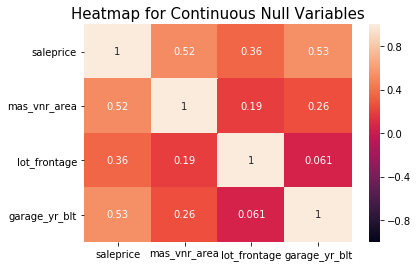

In [22]:
# Plot heatmap Continuous variables to see correlation
sns.heatmap(train_null_cont.corr(), vmin= -1, annot=True)
plt.title('Heatmap for Continuous Null Variables', fontsize = 15)

Checking the Correlation of Variables before filling up Null Values

In [23]:
# Fill Null Values of Mas Vnr Type
train['mas_vnr_type'].fillna("None", inplace=True)

In [24]:
# Fill Null Values of all columns
fill_null(train, train.columns)
train.dtypes.value_counts()

object     42
int64      24
float64    11
dtype: int64

In [25]:
# Reset index

train = train.reset_index(drop = True)
train.index


RangeIndex(start=0, stop=2049, step=1)

Though columns are categorical eg numerical, plotting out histograms allows for better visualisation and an insight to the skewness.

In [ ]:
#looking at skewness of SalePrice from the train dataset
sns.distplot(train['SalePrice']);
print('Skewness: %f' %  train['SalePrice'].skew())
print('Kurtosis: %f' %  train['SalePrice'].kurtosis())

In [26]:
# Add SalePrice Column into both DataFrames
train_cont = train[['saleprice']]
train_cat = train[['saleprice']]

In [27]:
# Split into Catergorical and Continuous Variable
for i in train.columns:
    if (i == 'saleprice'):
        print("saleprice Variable already added in the DataFrames")
    elif (train[i].dtype == 'object'):
        train_cat[i] = train[[i]]
    else:
        train_cont[i] = train[i]

saleprice Variable already added in the DataFrames


In [28]:
# Categorical
train_cat.head()


,saleprice,pid,ms_subclass,ms_zoning,street,lot_shape,land_contour,utilities,lot_config,land_slope,...,electrical,kitchen_qual,functional,fireplace_qu,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,sale_type
0,130500,533352170,60,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,WD
1,220000,531379050,60,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD
2,109000,535304180,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,SBrkr,Gd,Typ,NA,Detchd,Unf,TA,TA,Y,WD
3,174000,916386060,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,SBrkr,TA,Typ,NA,BuiltIn,Fin,TA,TA,Y,WD
4,138500,906425045,50,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,SBrkr,TA,Typ,NA,Detchd,Unf,TA,TA,N,WD


In [29]:
# Continuous
train_cont.head()

,saleprice,id,lot_frontage,lot_area,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,...,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
0,130500,109,0.0,13517,1976,2005,289.0,533.0,0.0,192.0,...,475.0,0,44,0,0,0,0,0,3,2010
1,220000,544,43.0,11492,1996,1997,132.0,637.0,0.0,276.0,...,559.0,0,74,0,0,0,0,0,4,2009
2,109000,153,68.0,7922,1953,2007,0.0,731.0,0.0,326.0,...,246.0,0,52,0,0,0,0,0,1,2010
3,174000,318,73.0,9802,2006,2007,0.0,0.0,0.0,384.0,...,400.0,100,0,0,0,0,0,0,4,2010
4,138500,255,82.0,14235,1900,1993,0.0,0.0,0.0,676.0,...,484.0,0,59,0,0,0,0,0,3,2010


In [30]:
# Drop Lot Frontage as there is little correlation and this column has multiple Null Values
train_cont = train_cont.drop(columns='lot_frontage')

In [31]:
train_ord = train[['saleprice','lot_shape','utilities','land_slope','overall_qual','overall_cond','exter_qual' , 'exter_cond','bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2','electrical', 'functional','garage_finish', 'garage_qual', 'garage_cond', 'paved_drive','heating_qc','kitchen_qual','fireplace_qu']]
train_nom = train[['saleprice','pid', 'ms_subclass', 'ms_zoning', 'street', 'land_contour', 'lot_config' ,'neighborhood', 'condition_1' ,'condition_2' ,'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'mas_vnr_type', 'foundation', 'heating','central_air', 'garage_type', 'sale_type', 'exterior_1st', 'exterior_2nd']]

In [32]:
train_nom.head()

,saleprice,pid,ms_subclass,ms_zoning,street,land_contour,lot_config,neighborhood,condition_1,condition_2,...,roof_style,roof_matl,mas_vnr_type,foundation,heating,central_air,garage_type,sale_type,exterior_1st,exterior_2nd
0,130500,533352170,60,RL,Pave,Lvl,CulDSac,Sawyer,RRAe,Norm,...,Gable,CompShg,BrkFace,CBlock,GasA,Y,Attchd,WD,HdBoard,Plywood
1,220000,531379050,60,RL,Pave,Lvl,CulDSac,SawyerW,Norm,Norm,...,Gable,CompShg,BrkFace,PConc,GasA,Y,Attchd,WD,VinylSd,VinylSd
2,109000,535304180,20,RL,Pave,Lvl,Inside,NAmes,Norm,Norm,...,Gable,CompShg,None,CBlock,GasA,Y,Detchd,WD,VinylSd,VinylSd
3,174000,916386060,60,RL,Pave,Lvl,Inside,Timber,Norm,Norm,...,Gable,CompShg,None,PConc,GasA,Y,BuiltIn,WD,VinylSd,VinylSd
4,138500,906425045,50,RL,Pave,Lvl,Inside,SawyerW,Norm,Norm,...,Gable,CompShg,None,PConc,GasA,Y,Detchd,WD,Wd Sdng,Plywood


The PID column is essentially the unique id of each property and would not have any predictive influence over models.

In [33]:
train_nom = train_nom.drop( axis = 1, columns = train[['pid']])

In [34]:
train_ord.head()

,saleprice,lot_shape,utilities,land_slope,overall_qual,overall_cond,exter_qual,exter_cond,bsmt_qual,bsmt_cond,...,bsmtfin_type_2,electrical,functional,garage_finish,garage_qual,garage_cond,paved_drive,heating_qc,kitchen_qual,fireplace_qu
0,130500,IR1,AllPub,Gtl,6,8,Gd,TA,TA,TA,...,Unf,SBrkr,Typ,RFn,TA,TA,Y,Ex,Gd,NA
1,220000,IR1,AllPub,Gtl,7,5,Gd,TA,Gd,TA,...,Unf,SBrkr,Typ,RFn,TA,TA,Y,Ex,Gd,TA
2,109000,Reg,AllPub,Gtl,5,7,TA,Gd,TA,TA,...,Unf,SBrkr,Typ,Unf,TA,TA,Y,TA,Gd,NA
3,174000,Reg,AllPub,Gtl,5,5,TA,TA,Gd,TA,...,Unf,SBrkr,Typ,Fin,TA,TA,Y,Gd,TA,NA
4,138500,IR1,AllPub,Gtl,6,8,TA,TA,Fa,Gd,...,Unf,SBrkr,Typ,Unf,TA,TA,N,TA,TA,NA


In [36]:
# Manual Method
# Create Dictionary for replacements

cleancl = {'lot_shape' : {'IR3':0,'IR2':1,'IR1':2,'Reg':3},
           'overall_qual': {'1': 0,'2':1,'3':2,'4':3,"5":4,"6":5,'7':6,'8':7,'9':8,'10':9},
           'overall_cond': {'1': 0,'2':1,'3':2,'4':3,"5":4,"6":5,'7':6,'8':7,'9':8},
           'exter_qual' : {'NA':0,"Po":1, 'Fa':2, 'TA': 3,'Gd': 4,"Ex":5},
           'exter_cond' : {'NA':0,"Po":1, 'Fa':2, 'TA': 3,'Gd': 4,"Ex":5},
           'bsmt_qual' : {'NA':0,"Po":1, 'Fa':2, 'TA': 3,'Gd': 4,"Ex":5},
           'bsmt_cond' : {'NA':0,"Po":1, 'Fa':2, 'TA': 3,'Gd': 4,"Ex":5},
           'bsmt_exposure' : {'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4},
           'bsmtfin_type_1' : {'NA':0,"Unf":1,'LwQ':2,'Rec':3,'BLQ':4,"ALQ":5,'GLQ':6},
           'bsmtfin_type_2' : {'NA':0,"Unf":1,'LwQ':2,'Rec':3,'BLQ':4,"ALQ":5,'GLQ':6},
           'functional' : {'Sal':0,'Sev':1,'Maj2':2,'Maj1':3,'Mod':4,'Min2':5,'Min1':6,'Typ':7},
           'garage_finish' : {'NA':0, 'Unf':1, 'RFn':2,'Fin':3},
           'garage_qual' : {'NA':0,"Po":1, 'Fa':2, 'TA': 3,'Gd': 4,"Ex":5},
           'garage_cond' : {'NA':0,"Po":1, 'Fa':2, 'TA': 3,'Gd': 4,"Ex":5},
           'paved_drive' : {'N':0,'P':1,'Y':2},
           'heating_qc' : {'NA':0,"Po":1, 'Fa':2, 'TA': 3,'Gd': 4,"Ex":5},
           'kitchen_qual' : {'NA':0,"Po":1, 'Fa':2, 'TA': 3,'Gd': 4,"Ex":5},
           'fireplace_qu' : {'NA':0,"Po":1, 'Fa':2, 'TA': 3,'Gd': 4,"Ex":5}
           
}

In [37]:
train_ord.replace(cleancl, inplace=True)

In [39]:
train_ord.drop(columns=['utilities','land_slope','electrical'], inplace = True, axis = 1)

In [40]:
train_ord.columns

Index(['saleprice', 'lot_shape', 'overall_qual', 'overall_cond', 'exter_qual',
       'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'functional', 'garage_finish',
       'garage_qual', 'garage_cond', 'paved_drive', 'heating_qc',
       'kitchen_qual', 'fireplace_qu'],
      dtype='object')

In [41]:
train_ord.head()

,saleprice,lot_shape,overall_qual,overall_cond,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,functional,garage_finish,garage_qual,garage_cond,paved_drive,heating_qc,kitchen_qual,fireplace_qu
0,130500,2,5,7,4,3,3,3,1,6,1,7,2,3,3,2,5,4,0
1,220000,2,6,4,4,3,4,3,1,6,1,7,2,3,3,2,5,4,3
2,109000,3,4,6,3,4,3,3,1,6,1,7,1,3,3,2,3,4,0
3,174000,3,4,4,3,3,4,3,1,1,1,7,3,3,3,2,4,3,0
4,138500,2,5,7,3,3,2,4,1,1,1,7,1,3,3,0,3,3,0


In [42]:
train_cont.head()

,saleprice,id,lot_area,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,...,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
0,130500,109,13517,1976,2005,289.0,533.0,0.0,192.0,725.0,...,475.0,0,44,0,0,0,0,0,3,2010
1,220000,544,11492,1996,1997,132.0,637.0,0.0,276.0,913.0,...,559.0,0,74,0,0,0,0,0,4,2009
2,109000,153,7922,1953,2007,0.0,731.0,0.0,326.0,1057.0,...,246.0,0,52,0,0,0,0,0,1,2010
3,174000,318,9802,2006,2007,0.0,0.0,0.0,384.0,384.0,...,400.0,100,0,0,0,0,0,0,4,2010
4,138500,255,14235,1900,1993,0.0,0.0,0.0,676.0,676.0,...,484.0,0,59,0,0,0,0,0,3,2010


In [43]:
train_nom.head()

,saleprice,ms_subclass,ms_zoning,street,land_contour,lot_config,neighborhood,condition_1,condition_2,bldg_type,...,roof_style,roof_matl,mas_vnr_type,foundation,heating,central_air,garage_type,sale_type,exterior_1st,exterior_2nd
0,130500,60,RL,Pave,Lvl,CulDSac,Sawyer,RRAe,Norm,1Fam,...,Gable,CompShg,BrkFace,CBlock,GasA,Y,Attchd,WD,HdBoard,Plywood
1,220000,60,RL,Pave,Lvl,CulDSac,SawyerW,Norm,Norm,1Fam,...,Gable,CompShg,BrkFace,PConc,GasA,Y,Attchd,WD,VinylSd,VinylSd
2,109000,20,RL,Pave,Lvl,Inside,NAmes,Norm,Norm,1Fam,...,Gable,CompShg,None,CBlock,GasA,Y,Detchd,WD,VinylSd,VinylSd
3,174000,60,RL,Pave,Lvl,Inside,Timber,Norm,Norm,1Fam,...,Gable,CompShg,None,PConc,GasA,Y,BuiltIn,WD,VinylSd,VinylSd
4,138500,50,RL,Pave,Lvl,Inside,SawyerW,Norm,Norm,1Fam,...,Gable,CompShg,None,PConc,GasA,Y,Detchd,WD,Wd Sdng,Plywood


In [44]:
train_ord.head()

,saleprice,lot_shape,overall_qual,overall_cond,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,functional,garage_finish,garage_qual,garage_cond,paved_drive,heating_qc,kitchen_qual,fireplace_qu
0,130500,2,5,7,4,3,3,3,1,6,1,7,2,3,3,2,5,4,0
1,220000,2,6,4,4,3,4,3,1,6,1,7,2,3,3,2,5,4,3
2,109000,3,4,6,3,4,3,3,1,6,1,7,1,3,3,2,3,4,0
3,174000,3,4,4,3,3,4,3,1,1,1,7,3,3,3,2,4,3,0
4,138500,2,5,7,3,3,2,4,1,1,1,7,1,3,3,0,3,3,0


Should a feature have an effect on SalePrice, they will be some correlation. A correlation of at least 0.7 will be considered high. 

However, there are some features that seem to strongly covary with a home's sale price. A few examples include the overall quality, lot square footage, and number of rooms above ground. It seems like there are many numerical features we could use to predict the price of a house. Now let's check out some non-numeric features!

In [ ]:
correlationsmat = train.corr()
best_feat = correlationsmat.index[abs(correlationsmat["SalePrice"])>0.5]

fix, ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=4)

# Generate a mask for the upper triangle
mask = np.zeros_like(train[best_feat].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns.
ax = sns.heatmap(train_updated[best_feat].corr(), mask=mask, ax=ax, cmap=sns.diverging_palette(20,220,n=100), annot=True)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=40, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=40, rotation=-45)
# plt.xticks(rotation=90)
# plt.yticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Heatmap for Continuous Variables')

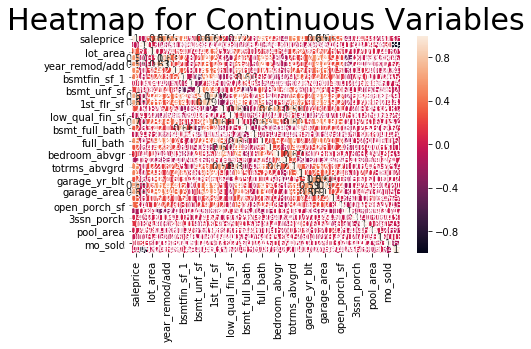

In [45]:
sns.heatmap(train_cont.corr(), vmin= -1, annot=True)
plt.title('Heatmap for Continuous Variables', fontsize = 30)

In [46]:
train_cont_corr = train_cont.corr()
train_cont_corr.sort_values(['saleprice'], ascending=False, inplace=True)
train_cont_corr['saleprice'].head(11)

saleprice         1.000000
gr_liv_area       0.719463
total_bsmt_sf     0.665116
garage_area       0.655097
1st_flr_sf        0.648252
garage_cars       0.648227
year_built        0.572405
year_remod/add    0.550872
full_bath         0.538225
mas_vnr_area      0.511273
totrms_abvgrd     0.509775
Name: saleprice, dtype: float64

Text(0.5, 1.0, 'Heatmap for Ordinal Variables')

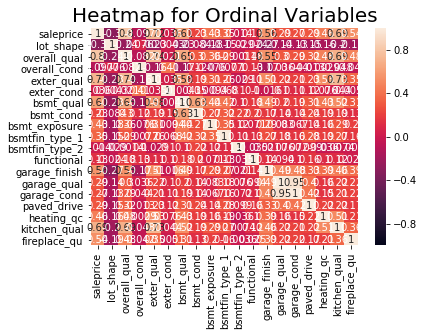

In [47]:
sns.heatmap(train_ord.corr(),vmin=-1, annot=True)
plt.title('Heatmap for Ordinal Variables', fontsize = 20)

In [49]:
train_ord_corr = train_ord.corr()
train_ord_corr.sort_values(["saleprice"], ascending=False, inplace= True)
train_ord_corr["saleprice"].head(11)

saleprice         1.000000
overall_qual      0.803462
exter_qual        0.715048
kitchen_qual      0.694295
bsmt_qual         0.613236
garage_finish     0.558566
fireplace_qu      0.539484
heating_qc        0.458636
bsmt_exposure     0.426134
bsmtfin_type_1    0.350728
paved_drive       0.290528
Name: saleprice, dtype: float64

In [50]:
# Nominal df

train_model_nom = train_nom[['saleprice','ms_zoning', "street", 'neighborhood','condition_1', 'condition_2', 'house_style', 'roof_matl', 'heating', "central_air", "garage_type", "sale_type"]]
train_model_nom = pd.get_dummies(train_model_nom, drop_first=True)
train_model_nom.head()

,saleprice,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,neighborhood_Blueste,neighborhood_BrDale,...,garage_type_Detchd,garage_type_NA,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,130500,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,220000,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,109000,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,174000,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,138500,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [54]:
# Ordinal df

train_model_ord = train_ord[train_ord_corr["saleprice"].iloc[0:11].index ]
train_model_ord.head()

,saleprice,overall_qual,exter_qual,kitchen_qual,bsmt_qual,garage_finish,fireplace_qu,heating_qc,bsmt_exposure,bsmtfin_type_1,paved_drive
0,130500,5,4,4,3,2,0,5,1,6,2
1,220000,6,4,4,4,2,3,5,1,6,2
2,109000,4,3,4,3,1,0,3,1,6,2
3,174000,4,3,3,4,3,0,4,1,1,2
4,138500,5,3,3,2,1,0,3,1,1,0


In [55]:
# Continous df

train_model_cont = train_cont[train_cont_corr["saleprice"].iloc[0:11].index]
train_model_cont.head()

,saleprice,gr_liv_area,total_bsmt_sf,garage_area,1st_flr_sf,garage_cars,year_built,year_remod/add,full_bath,mas_vnr_area,totrms_abvgrd
0,130500,1479,725.0,475.0,725,2.0,1976,2005,2,289.0,6
1,220000,2122,913.0,559.0,913,2.0,1996,1997,2,132.0,8
2,109000,1057,1057.0,246.0,1057,1.0,1953,2007,1,0.0,5
3,174000,1444,384.0,400.0,744,2.0,2006,2007,2,0.0,7
4,138500,1445,676.0,484.0,831,2.0,1900,1993,2,0.0,6


In [56]:
# Merge 3 DataFrames together
train_new = pd.concat([pd.concat([train_model_cont, train_model_ord.drop(columns = "saleprice")], axis=1),train_model_nom.drop(columns = "saleprice")], axis=1)
train_new.head()

,saleprice,gr_liv_area,total_bsmt_sf,garage_area,1st_flr_sf,garage_cars,year_built,year_remod/add,full_bath,mas_vnr_area,...,garage_type_Detchd,garage_type_NA,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,130500,1479,725.0,475.0,725,2.0,1976,2005,2,289.0,...,0,0,0,0,0,0,0,0,0,1
1,220000,2122,913.0,559.0,913,2.0,1996,1997,2,132.0,...,0,0,0,0,0,0,0,0,0,1
2,109000,1057,1057.0,246.0,1057,1.0,1953,2007,1,0.0,...,1,0,0,0,0,0,0,0,0,1
3,174000,1444,384.0,400.0,744,2.0,2006,2007,2,0.0,...,0,0,0,0,0,0,0,0,0,1
4,138500,1445,676.0,484.0,831,2.0,1900,1993,2,0.0,...,1,0,0,0,0,0,0,0,0,1


In [57]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
train_new_corr = train_new.corr()
train_new_corr.sort_values(["saleprice"], ascending=False, inplace= True)
train_new_corr['saleprice'].head(30)

saleprice               1.000000
overall_qual            0.803462
gr_liv_area             0.719463
exter_qual              0.715048
kitchen_qual            0.694295
total_bsmt_sf           0.665116
garage_area             0.655097
1st_flr_sf              0.648252
garage_cars             0.648227
bsmt_qual               0.613236
year_built              0.572405
garage_finish           0.558566
year_remod/add          0.550872
fireplace_qu            0.539484
full_bath               0.538225
mas_vnr_area            0.511273
totrms_abvgrd           0.509775
heating_qc              0.458636
neighborhood_NridgHt    0.448639
bsmt_exposure           0.426134
sale_type_New           0.360599
garage_type_Attchd      0.358104
bsmtfin_type_1          0.350728
paved_drive             0.290528
central_air_Y           0.277425
neighborhood_NoRidge    0.263385
neighborhood_StoneBr    0.256968
ms_zoning_RL            0.231567
garage_type_BuiltIn     0.219800
house_style_2Story      0.202270
Name: sale

In [58]:
# Main model use to predict Housing Price
train_new_feat = train_new_corr["saleprice"].iloc[1:31].index 
train_model_1 = train_new[train_new_feat ]

In [59]:
train_model_1.head()

,overall_qual,gr_liv_area,exter_qual,kitchen_qual,total_bsmt_sf,garage_area,1st_flr_sf,garage_cars,bsmt_qual,year_built,garage_finish,year_remod/add,fireplace_qu,full_bath,mas_vnr_area,totrms_abvgrd,heating_qc,neighborhood_NridgHt,bsmt_exposure,sale_type_New,garage_type_Attchd,bsmtfin_type_1,paved_drive,central_air_Y,neighborhood_NoRidge,neighborhood_StoneBr,ms_zoning_RL,garage_type_BuiltIn,house_style_2Story,neighborhood_Somerst
0,5,1479,4,4,725.0,475.0,725,2.0,3,1976,2,2005,0,2,289.0,6,5,0,1,0,1,6,2,1,0,0,1,0,1,0
1,6,2122,4,4,913.0,559.0,913,2.0,4,1996,2,1997,3,2,132.0,8,5,0,1,0,1,6,2,1,0,0,1,0,1,0
2,4,1057,3,4,1057.0,246.0,1057,1.0,3,1953,1,2007,0,1,0.0,5,3,0,1,0,0,6,2,1,0,0,1,0,0,0
3,4,1444,3,3,384.0,400.0,744,2.0,4,2006,3,2007,0,2,0.0,7,4,0,1,0,0,1,2,1,0,0,1,1,1,0
4,5,1445,3,3,676.0,484.0,831,2.0,2,1900,1,1993,0,2,0.0,6,3,0,1,0,0,1,0,1,0,0,1,0,0,0


In [60]:
X_1 = train_model_1
y_1 = train_new["saleprice"]

train_test_split is used to hold out a test set to understand how the model performs on data unseen. The model might fit the train dataset but not score well on the test dataset, which means that it might not perform well if there are new elements. 

using StandardScaler, fitting the scaler on the training dataset and transform both train and test datasets. 

In [61]:
# Creating the train/test split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1,test_size=0.2, random_state = 42)

In [62]:
ss = StandardScaler()
X_train_sc_1 = ss.fit_transform(X_train_1)
X_test_sc_1 = ss.transform(X_test_1)

In [63]:
lr = LinearRegression()

In [64]:
lasso = LassoCV(n_alphas=200)

In [65]:
ridge = RidgeCV(alphas = np.linspace(.1,10,100))

# r^2 score for the models
# Cross validation

In [66]:
lr_score_1 = cross_val_score(lr,X_train_sc_1,y_train_1,cv=10)
lr_score_1.mean()

0.8704456237705237

In [67]:
ridge_score_1 = cross_val_score(ridge, X_train_sc_1, y_train_1, cv=10)
ridge_score_1.mean()

0.8705873106133538

In [68]:
lasso_score_1 = cross_val_score(lasso, X_train_sc_1, y_train_1, cv=10)
lasso_score_1.mean()

0.8713464576083428

Obviously lr will not be considered. Between Lasso and Ridge, Ridge is a better predictor even though the R2 Score is marginly lesser than that of Lasso. The reason is that practically Ridge is preferred. Lasso is just to refine and filter the low-correlated features. 

In [69]:
# Fitting the model to training data
lasso.fit(X_train_sc_1, y_train_1)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=200, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [70]:
# Training Data Score
lasso.score(X_train_sc_1, y_train_1)

0.8817514955680438

In [71]:
# Testing Data Score
lasso.score(X_test_sc_1, y_test_1)

0.8788158025356718

From the scores of my training scores and my test scores, the training scores are slightly higher than test scores, this shows there is a very slight overfitting and I should identify some columns to drop.

Text(0.5, 1.0, 'Coefficients of Predictors')

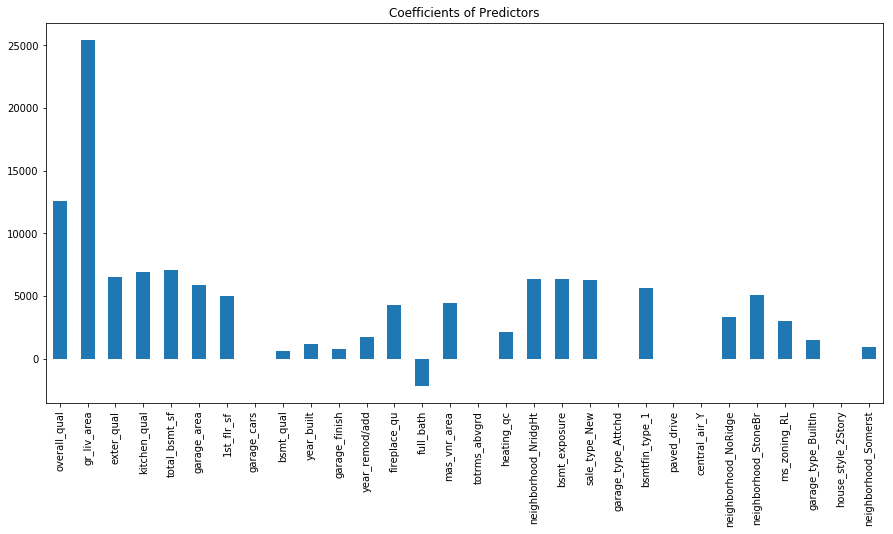

In [72]:
# Barplot to see how each coefficient of the variables relate to the SalesPrice
pd.Series(lasso.coef_, index=train_new_feat).plot.bar(figsize=(15, 7))
plt.title('Coefficients of Predictors')

A common rule of thumb is that multicollinearity may be a problem in a data set if any pairwise |r| > 0.7

In [73]:
topcorr(X_1)

overall_qual and exter_qual corr = 0.738369519365889
gr_liv_area and totrms_abvgrd corr = 0.8121286437704833
exter_qual and overall_qual corr = 0.7383695193658891
exter_qual and kitchen_qual corr = 0.7290477397813655
kitchen_qual and exter_qual corr = 0.7290477397813656
total_bsmt_sf and 1st_flr_sf corr = 0.7902456760467323
garage_area and garage_cars corr = 0.897310248028498
1st_flr_sf and total_bsmt_sf corr = 0.7902456760467323
garage_cars and garage_area corr = 0.897310248028498
totrms_abvgrd and gr_liv_area corr = 0.8121286437704833


condition is correlation > 0.7

In [74]:
# Drop columns to create Final Model 1
train_model_1_new = train_model_1.drop(columns=['garage_cars','totrms_abvgrd','1st_flr_sf','exter_qual','garage_type_Attchd','paved_drive','central_air_Y','house_style_2Story'])

In [75]:
# Create our features matrix (`X`) and target vector (`y`)
X_1_new = train_model_1_new
y_1_new = train_new["saleprice"]

In [76]:
# Creating the train/test split
X_train_1_new, X_test_1_new, y_train_1_new, y_test_1_new = train_test_split(X_1_new,y_1_new,test_size=0.2, random_state = 42)

In [78]:
# Normalize / PowerTransform Values
X_train_sc_1_new = ss.fit_transform(X_train_1_new)
X_test_sc_1_new = ss.transform(X_test_1_new)

In [79]:
# Cross validation
lasso_score_1 = cross_val_score(lasso, X_train_sc_1_new, y_train_1_new, cv=10)
print("Lasso Regression Score :" + str(lasso_score_1.mean()))
lr_score_1 = cross_val_score(lr,X_train_sc_1_new,y_train_1_new,cv=10)
print("Linear Regression Score :" + str(lr_score_1.mean()))
ridge_score_1 = cross_val_score(ridge, X_train_sc_1_new, y_train_1_new, cv=10)
print("Ridge Regression Score :" + str(ridge_score_1.mean()))


Lasso Regression Score :0.8684674395776794
Linear Regression Score :0.8685049281968749
Ridge Regression Score :0.8686106292275871


In [81]:
# Fitting the model to training data
ridge.fit(X_train_sc_1_new, y_train_1_new)

RidgeCV(alphas=array([ 0.1,  0.2, ...,  9.9, 10. ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [82]:
# Training Data Score
ridge.score(X_train_sc_1_new, y_train_1_new)

0.8790478035017015

In [83]:
# Testing Data Score
ridge.score(X_test_sc_1_new, y_test_1_new)

0.8767792620058581

the score difference is very small so the model prediction is fine! Somewhat accurate:) 

In [84]:
# Calculating the Predicted Price using X_test_sc1_fin
pred_1 = ridge.predict(X_test_sc_1_new)

In [85]:
residuals_1 = y_test_1_new - pred_1

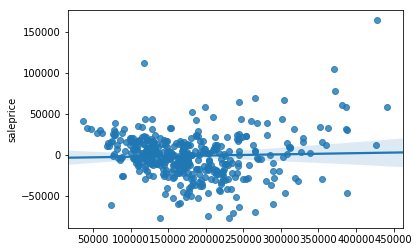

In [86]:
sns.regplot(pred_1,residuals_1)

Scatterplot show an even spread of between predicted and residuals except for a few outliers.

In [87]:
# RMSE of the model
rmse_1 = np.sqrt(mean_squared_error(y_test_1_new, pred_1))
rmse_1

27111.076995665055

<a id='model2'></a>
# Model 2

<a id='merge2'></a>
### Merge DataFrames (Cont / Ord / Nom)

In [88]:
train_nom_2 = pd.get_dummies(train_nom, drop_first=True)
train_nom_2.head()

,saleprice,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,...,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng
0,130500,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,220000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,109000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,174000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,138500,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [89]:
train_ord.head()

,saleprice,lot_shape,overall_qual,overall_cond,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,functional,garage_finish,garage_qual,garage_cond,paved_drive,heating_qc,kitchen_qual,fireplace_qu
0,130500,2,5,7,4,3,3,3,1,6,1,7,2,3,3,2,5,4,0
1,220000,2,6,4,4,3,4,3,1,6,1,7,2,3,3,2,5,4,3
2,109000,3,4,6,3,4,3,3,1,6,1,7,1,3,3,2,3,4,0
3,174000,3,4,4,3,3,4,3,1,1,1,7,3,3,3,2,4,3,0
4,138500,2,5,7,3,3,2,4,1,1,1,7,1,3,3,0,3,3,0


In [90]:
train_cont.head()

,saleprice,id,lot_area,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
0,130500,109,13517,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010
1,220000,544,11492,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009
2,109000,153,7922,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010
3,174000,318,9802,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010
4,138500,255,14235,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010


In [91]:
# Merging DataFrames
train_new_alt = pd.concat([pd.concat([train_cont,train_ord.drop(columns = "saleprice")],axis=1),train_nom_2.drop(columns = "saleprice")],axis = 1)
train_new_alt

,saleprice,id,lot_area,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,lot_shape,overall_qual,overall_cond,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,functional,garage_finish,garage_qual,garage_cond,paved_drive,heating_qc,...,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng
0,130500,109,13517,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,2,5,7,4,3,3,3,1,6,1,7,2,3,3,2,5,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,220000,544,11492,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,2,6,4,4,3,4,3,1,6,1,7,2,3,3,2,5,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,109000,153,7922,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,3,4,6,3,4,3,3,1,6,1,7,1,3,3,2,3,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,174000,318,9802,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010,3,4,4,3,3,4,3,1,1,1,7,3,3,3,2,4,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,138500,255,14235,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010,2,5,7,3,3,2,4,1,1,1,7,1,3,3,0,3,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,298751,1587,11449,2007,2007,0.0,1011.0,0.0,873.0,1884.0,1728,0,0,1728,1.0,0.0,2,0,3,1,7,1,2007.0,2.0,520.0,0,276,0,0,0,0,0,1,2008,2,7,4,4,3,4,3,3,6,1,7,3,3,3,2,5,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2045,82500,785,12342,1940,1950,0.0,262.0,0.0,599.0,861.0,861,0,0,861,0.0,0.0,1,0,1,1,4,0,1961.0,2.0,539.0,158,0,0,0,0,0,0,3,2009,2,3,4,3,3,3,3,1,4,1,7,1,3,3,2,5,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2046,177000,916,7558,1928,1950,0.0,0.0,0.0,896.0,896.0,1172,741,0,1913,0.0,0.0,1,1,3,1,9,1,1929.0,2.0,342.0,0,0,0,0,0,0,0,3,2009,3,5,5,3,3,3,3,1,1,1,7,1,2,2,2,4,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0

<a id='lasso'></a>
### Using LassoCV to remove unneccessary Variables

Lasso deals primarily with the feature selection of valuable variables, eliminating ones that are not useful. 

This also takes care of multicollinearity,but in a different way: it will choose the "best" of the correlated variables and zero-out the other redundant ones.

There may also be useless variables in the data which it is simply getting rid of entirely.

Hence, for this model, we will use this method to get the best variables.

In [92]:
train_new_alt_features = train_new_alt.drop(columns = "saleprice").columns
X = train_new_alt.drop(columns = "saleprice")
y = train_new_alt["saleprice"]

In [93]:
# Scale X
X_sc = ss.fit_transform(X)

In [94]:
lasso.fit(X_sc,y)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=200, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [95]:
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)
lasso_coefs.head(25)

,abs_coef,coef,variable
12,25262.757467,25262.757467,gr_liv_area
34,12009.591404,12009.591404,overall_qual
5,9229.177360,9229.177360,bsmtfin_sf_1
98,7519.554871,7519.554871,neighborhood_NridgHt
2,6851.839608,6851.839608,year_built
8,6407.376545,6407.376545,total_bsmt_sf
104,5673.465734,5673.465734,neighborhood_StoneBr
36,5486.974427,5486.974427,exter_qual
4,5484.792593,5484.792593,mas_vnr_area
125,4750.285799,-4750.285799,bldg_type_TwnhsE


<a id='model_prep2'></a>
### Create Model

In [96]:
features_2 = lasso_coefs["variable"].iloc[:26]


### Model Prep: Create our features matrix (`X`) and target vector (`y`)

In [98]:
X_2 = train_new_alt[features_2]
y_2 = train_new_alt["saleprice"]

In [99]:
topcorr(X_2)

overall_qual and exter_qual corr = 0.738369519365889
exter_qual and overall_qual corr = 0.7383695193658891
exter_qual and kitchen_qual corr = 0.7290477397813655
kitchen_qual and exter_qual corr = 0.7290477397813656


In [100]:
# Drop Columns
X_2 = X_2.drop(columns=['exter_qual'])
features_2 = X_2.columns

In [101]:
X_2.shape

(2049, 25)


### Model Prep: Train/test split

In [102]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state = 42)


### Model Prep: Normalize / PowerTransform Values

In [103]:
X_train_sc_2 = ss.fit_transform(X_train_2)
X_test_sc_2 = ss.transform(X_test_2)


### Cross validation

In [104]:
lasso_score_2 = cross_val_score(lasso, X_train_sc_2, y_train_2, cv=10)
print("Lasso Regression Score :" + str(lasso_score_2.mean()))
lr_score_2 = cross_val_score(lr,X_train_sc_2,y_train_2,cv=10)
print("Linear Regression Score :" + str(lr_score_2.mean()))
ridge_score_2 = cross_val_score(ridge, X_train_sc_2, y_train_2, cv=10)
print("Ridge Regression Score :" + str(ridge_score_2.mean()))

Lasso Regression Score :0.8987507849405587
Linear Regression Score :0.871953855202255
Ridge Regression Score :0.8987716921062543



### Model Fitting and Evaluation

In [105]:
# Fitting the training data into Ridge Regression Model
ridge_new = ridge.fit(X_train_sc_2, y_train_2)

In [106]:
# Score of the Training Data
ridge.score(X_train_sc_2,y_train_2)

0.9094023064919391

In [107]:
# Score of the Test Data
ridge.score(X_test_sc_2, y_test_2)

0.9018005839431997

In [108]:
# Calculating predicted price
pred_2 = ridge.predict(X_test_sc_2)

In [109]:
residuals_2 = y_test_2 - pred_2

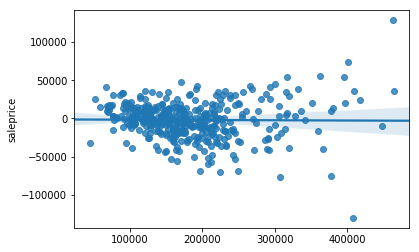

In [110]:
# Plotting a graph of residuals against prediction
sns.regplot(pred_2,residuals_2)

In [111]:
# RMSE of the model
rmse_2 = np.sqrt(mean_squared_error(y_test_2, pred_2))
rmse_2

24202.449368917634

<a id='model_3'></a>
# Model 3

<a id='merge3'></a>
### Merge DataFrames

In [112]:
train_3 = pd.concat([pd.concat([train_cont,train_ord.drop(columns = "saleprice")],axis=1),train_nom.drop(columns = "saleprice")],axis = 1)
train_3.head()

,saleprice,id,lot_area,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,lot_shape,overall_qual,overall_cond,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,functional,garage_finish,garage_qual,garage_cond,paved_drive,heating_qc,kitchen_qual,fireplace_qu,ms_subclass,ms_zoning,street,land_contour,lot_config,neighborhood,condition_1,condition_2,bldg_type,house_style,roof_style,roof_matl,mas_vnr_type,foundation,heating,central_air,garage_type,sale_type,exterior_1st,exterior_2nd
0,130500,109,13517,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,2,5,7,4,3,3,3,1,6,1,7,2,3,3,2,5,4,0,60,RL,Pave,Lvl,CulDSac,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,BrkFace,CBlock,GasA,Y,Attchd,WD,HdBoard,Plywood
1,220000,544,11492,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,2,6,4,4,3,4,3,1,6,1,7,2,3,3,2,5,4,3,60,RL,Pave,Lvl,CulDSac,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,BrkFace,PConc,GasA,Y,Attchd,WD,VinylSd,VinylSd
2,109000,153,7922,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,3,4,6,3,4,3,3,1,6,1,7,1,3,3,2,3,4,0,20,RL,Pave,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,None,CBlock,GasA,Y,Detchd,WD,VinylSd,VinylSd
3,174000,318,9802,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010,3,4,4,3,3,4,3,1,1,1,7,3,3,3,2,4,3,0,60,RL,Pave,Lvl,Inside,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,None,PConc,GasA,Y,BuiltIn,WD,VinylSd,VinylSd
4,138500,255,14235,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010,2,5,7,3,3,2,4,1,1,1,7,1,3,3,0,3,3,0,50,RL,Pave,Lvl,Inside,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,None,PConc,GasA,Y,Detchd,WD,Wd Sdng,Plywood


In [114]:
# Combine Overall Qual and Overall Cond
train_3['comb_overall'] = train_3['overall_qual'] * train_3['overall_cond']
# Combine Exter Qual and Exter Cond
train_3['exter_overall'] = train_3['exter_qual'] * train_3['exter_cond']
# Combine Bsmt Qual and Bsmt Cond
train_3['bsmt_overall'] = train_3['bsmt_qual'] * train_3['bsmt_cond']
# Combine Full Bath and Half Bath
# train_3['total_bath'] = train_3['bsmt_full_bath'] + train_3['full_bath'] + (0.5*(train_3['bsmt_half_bath']  + train_3['half_bath']))
# Combine Kitchen and Kitchen Quality
train_3['kitchen_overall'] = train_3['kitchen_abvgr'] * train_3['kitchen_qual']
# Combine Fireplace
# train_3['fireplace_overall'] = train_3['fireplaces'] * train_3['fireplace_qu']
# Garage Overall
train_3['garage_overall'] = train_3['garage_qual'] * train_3['garage_cond']
# Combine all the SF
train_3['total_sf'] = train_3['total_bsmt_sf'] + train_3['gr_liv_area'] + train_3["garage_area"]

In [115]:
train_3.shape

(2049, 80)

Drop Columns that have been combined because the combined columns would have extremely high correlation with the columns that created it. To avoid this situation. We drop the columns that were used.

In [116]:
train_3 = train_3.drop(columns=['overall_qual','overall_cond','exter_qual','exter_cond','bsmt_qual','bsmt_cond','bsmt_full_bath','full_bath','bsmt_half_bath','half_bath', 'kitchen_abvgr', 'kitchen_qual', 'fireplaces', 'fireplace_qu', 'garage_qual', 'garage_cond', 'total_bsmt_sf', 'gr_liv_area', 'garage_area'])

In [117]:
train_3 = pd.get_dummies(train_3)

In [119]:
train_last_corr = train_3.corr()
train_last_corr.sort_values(["saleprice"], ascending=False, inplace= True)
train_last_corr['saleprice'].head(28)

saleprice               1.000000
total_sf                0.853743
1st_flr_sf              0.648252
garage_cars             0.648227
total_bath              0.632542
bsmt_overall            0.601286
exter_overall           0.598104
year_built              0.572405
garage_finish           0.558566
comb_overall            0.556418
year_remod/add          0.550872
foundation_PConc        0.529500
fireplace_overall       0.522658
mas_vnr_area            0.511273
totrms_abvgrd           0.509775
kitchen_overall         0.458750
heating_qc              0.458636
neighborhood_NridgHt    0.448639
bsmtfin_sf_1            0.446103
bsmt_exposure           0.426134
sale_type_New           0.360599
garage_type_Attchd      0.358104
ms_subclass_60          0.356092
bsmtfin_type_1          0.350728
exterior_1st_VinylSd    0.342156
open_porch_sf           0.338545
exterior_2nd_VinylSd    0.337571
wood_deck_sf            0.327629
Name: saleprice, dtype: float64

In [120]:
features_3 = train_last_corr["saleprice"].iloc[1:28].index 

In [121]:
X_3 = train_3[features_3]
y_3 = train_3["saleprice"]

A common rule of thumb is that multicollinearity may be a problem in a data set if any pairwise |r| > 0.7a

In [122]:
topcorr(X_3)

total_sf and 1st_flr_sf corr = 0.7720613166256706
1st_flr_sf and total_sf corr = 0.7720613166256706
bsmtfin_sf_1 and bsmtfin_type_1 corr = 0.7229991607608344
bsmtfin_type_1 and bsmtfin_sf_1 corr = 0.7229991607608344
exterior_1st_VinylSd and exterior_2nd_VinylSd corr = 0.9775566401962129
exterior_2nd_VinylSd and exterior_1st_VinylSd corr = 0.977556640196213


Drop Columns : 1st Flr SF, BsmtFin Type 1, Exterior 2nd_VinylSd because their correlation to SalePrice is lower than their counterpart.

In [123]:
# Drop Columns
X_3 = X_3.drop(columns=['1st_flr_sf', 'bsmtfin_type_1', 'exterior_2nd_VinylSd'])

<a id='Model_prep3'></a>
### Model Prep: Train/test split

In [124]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state = 42)

### Model Prep: Normalize / PowerTransform Values

In [127]:
X_train_sc_3 = ss.fit_transform(X_train_3)
X_test_sc_3 = ss.transform(X_test_3)


### Cross validation

In [128]:
lasso_score_3 = cross_val_score(lasso, X_train_sc_3, y_train_3, cv=10)
print("Lasso Regression Score :" + str(lasso_score_3.mean()))
lr_score_3 = cross_val_score(lr,X_train_sc_3,y_train_3,cv=10)
print("Linear Regression Score :" + str(lr_score_3.mean()))
ridge_score_3 = cross_val_score(ridge, X_train_sc_3, y_train_3, cv=10)
print("Ridge Regression Score :" + str(ridge_score_3.mean()))

Lasso Regression Score :0.8669091486564027
Linear Regression Score :0.8667772403341854
Ridge Regression Score :0.8668125952969611


Ridge Regression is the best, so Ridge will still stay at the regression to fit the model


### Model Fitting and Evaluation

In [129]:
# Fitting the training data into lasso Regression Model
lasso.fit(X_train_sc_3, y_train_3)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=200, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [130]:
# Score of the Training Data
lasso.score(X_train_sc_3,y_train_3)

0.875446618350502

In [131]:
# Score of the Test Data
lasso.score(X_test_sc_3, y_test_3)

0.8771038014366126

The Score of the training data is slightly higher than the score of the test data. This shows there is no signs of overfitting.

In [132]:
# Calculating predicted price
pred_3 = lasso.predict(X_test_sc3)

In [133]:
residuals_3 = y_test_3 - pred_3

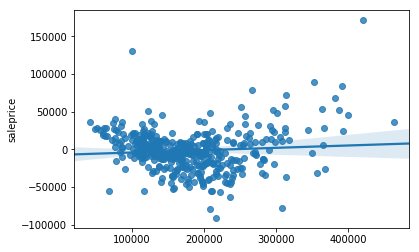

In [134]:
# Plotting a graph of residuals against prediction
sns.regplot(pred_3,residuals_3)

Scatterplot shows random distribution of plot except for 1 outlier. Model is good.

In [135]:
# RMSE of the model
rmse_2 = np.sqrt(mean_squared_error(y_test_3, pred_3))
rmse_2

27075.350807284263

In [136]:
# Load Kaggle Dataset
kaggle_test = pd.read_csv("../datasets/test.csv", dtype={'MS SubClass': object, "PID": object, "Overall Qual": object, "Overall Cond": object})
kaggle_test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [137]:
# Clean Kaggle Dataset
kaggle_test = kaggle_test.drop(columns = ['Misc Feature','Fence', 'Pool QC', 'Alley', 'Lot Frontage', "PID", 'Utilities', 'Land Slope', 'Electrical'], axis = 1)
kaggle_test['Mas Vnr Type'].fillna("None", inplace=True)

In [138]:
# Fill Null Values
fill_null(kaggle_test, kaggle_test.columns)

In [139]:
# Rename Columns
kaggle_test = kaggle_test.rename(columns = lambda x : rename(x))

In [141]:
# Rank all Ordinal Variables
kaggle_test.replace(cleancl, inplace=True)


In [142]:
# Change Nominal Data to get_dummies
kaggle_test_dum = pd.get_dummies(kaggle_test)

## Predict Kaggle Data with Model 1

In [144]:
# Create Similar Columns with Kaggle Test Data
kaggle_test_1 = kaggle_test_dum[X_1_new.columns]
kaggle_test_1.head()

,overall_qual,gr_liv_area,kitchen_qual,total_bsmt_sf,garage_area,bsmt_qual,year_built,garage_finish,year_remod/add,fireplace_qu,full_bath,mas_vnr_area,heating_qc,neighborhood_NridgHt,bsmt_exposure,sale_type_New,bsmtfin_type_1,neighborhood_NoRidge,neighborhood_StoneBr,ms_zoning_RL,garage_type_BuiltIn,neighborhood_Somerst
0,5,1928,2,1020,440,2,1910,1,1950,0,2,0.0,4,0,1,0,1,0,0,0,0,0
1,4,1967,3,1967,580,4,1977,3,1977,0,2,0.0,3,0,1,0,1,0,0,1,0,0
2,6,1496,4,654,426,4,2006,2,2006,4,2,0.0,5,0,3,1,6,0,0,1,0,0
3,4,968,3,968,480,3,1923,1,2006,0,1,0.0,3,0,1,0,1,0,0,0,0,0
4,5,1394,3,1394,514,4,1963,2,1963,4,1,247.0,4,0,1,0,4,0,0,1,0,0


In [146]:
# Fit Model 1 into Ridge Regression
X_train_sc_1_new = ss.fit_transform(X_train_1_new)
ridge.fit(X_train_sc_1_new, y_train_1_new)

RidgeCV(alphas=array([ 0.1,  0.2, ...,  9.9, 10. ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [147]:
# Scale Kaggle Model 1 based on scalling of Model 1
kaggle_test_model_1 = ss.transform(kaggle_test_1)

In [148]:
# Predict Kaggle SalePrice
pred_kaggle_1 = ridge.predict(kaggle_test_model_1)

In [149]:
# Create DataFrame with ID and SalePrice
prediction_1 = kaggle_test[["id"]]
prediction_1["SalePrice"] = pred_kaggle_1
prediction_1.rename(columns={'id':'Id'}, inplace=True)
prediction_1.set_index('Id', inplace= True)

In [150]:
# Save Dataset to CSV to submit to Kaggle
prediction_1.to_csv("./prediction_1.csv")

### Kaggle Score for Model 1: RMSE = 31730 (Public) , 33020 (Private) 

## Predict Kaggle Data with Model 2

In [151]:
kaggle_test_dum['neighborhood_GrnHill'] = 0

In [152]:
# Create Similar Columns with Kaggle Test Data
kaggle_test_2 = kaggle_test_dum[X_2.columns]
kaggle_test_2.shape

(879, 25)

In [155]:
# Fit Model 2 into Ridge Regression
X_train_sc_2 = ss.fit_transform(X_train_2)
ridge.fit(X_train_sc_2, y_train_2)

RidgeCV(alphas=array([ 0.1,  0.2, ...,  9.9, 10. ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [156]:
# Scale Kaggle Model 2 based on scalling of Model 2
kaggle_test_model_2 = ss.transform(kaggle_test_2)

In [157]:
# Predict Kaggle SalePrice
pred_kaggle_2 = ridge.predict(kaggle_test_model_2)

In [158]:
# Create DataFrame with ID and SalePrice
prediction_2 = kaggle_test[["id"]]
prediction_2["saleprice"] = pred_kaggle_2
prediction_2.rename(columns={'id':'Id'}, inplace=True)
prediction_2.set_index('Id', inplace= True)

In [159]:
# Save Dataset to CSV to submit to Kaggle
prediction_2.to_csv("./prediction_2.csv")

### Kaggle Score for Model 2: RMSE = 28670 (Public) , 31710 (Private)

## Predict Kaggle Data with Model 3

In [163]:
# Combine Overall Qual and Overall Cond
kaggle_test['comb_overall'] = kaggle_test['overall_qual'] * kaggle_test['overall_cond']
# Combine Exter Qual and Exter Cond
kaggle_test['exter_overall'] = kaggle_test['exter_qual'] * kaggle_test['exter_cond']
# Combine Bsmt Qual and Bsmt Cond
kaggle_test['bsmt_overall'] = kaggle_test['bsmt_qual'] * kaggle_test['bsmt_cond']
# Combine Full Bath and Half Bath
kaggle_test['total_bath'] = kaggle_test['bsmt_full_bath'] + kaggle_test['full_bath'] + (0.5*(kaggle_test['bsmt_half_bath']  + kaggle_test['half_bath']))
# Combine Kitchen and Kitchen Quality
kaggle_test['kitchen_overall'] = kaggle_test['kitchen_abvgr'] * kaggle_test['kitchen_qual']
# Combine Fireplace
kaggle_test['fireplace_overall'] = kaggle_test['fireplaces'] * kaggle_test['fireplace_qu']
# Garage Overall
kaggle_test['garage_overall'] = kaggle_test['garage_qual'] * kaggle_test['garage_cond']
# Combine all the SF
kaggle_test['total_sf'] = kaggle_test['total_bsmt_sf'] + kaggle_test['gr_liv_area'] + kaggle_test["garage_area"]

In [164]:
# Change Datatype to correct datatype
kaggle_test['bsmt_overall'] = kaggle_test['bsmt_overall'].astype(int)

In [165]:
# Create Similar Columns with Kaggle Test Data
kaggle_test_dum_3 = pd.get_dummies(kaggle_test)
kaggle_test_3 = kaggle_test_dum_3[X_3.columns]

In [166]:
# Fit Model 2 into Ridge Regression
X_train_sc_3 = ss.fit_transform(X_train_3)
lasso.fit(X_train_sc_3, y_train_3)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=200, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [167]:
# Scale Kaggle Model 2 based on scalling of Model 2
kaggle_test_model_3 = ss.transform(kaggle_test_3)

In [168]:
# Predict Kaggle SalePrice
pred_kaggle_3 = lasso.predict(kaggle_test_model_3)

In [169]:
# Create DataFrame with ID and SalePrice
prediction_3 = kaggle_test[["id"]]
prediction_3["SalePrice"] = pred_kaggle_3
prediction_3.rename(columns={'id':'Id'}, inplace=True)
prediction_3.set_index('Id', inplace= True)

In [170]:
# Save Dataset to CSV to submit to Kaggle
prediction_3.to_csv("./prediction_3.csv")

### Kaggle Score for Model 3: RMSE = 33610 (Public) , 33340 (Private)

# Model Selection

To interpret regression models, metrics used are:
1. R2-score
2. MSE/RMSE
3. Coefficients

Ridge and Lasso Regression can reduce the model complexity and prevent over-fitting as compared to the basic Linear Regression. Considering that there are constraints on the coefs, the optimisation function is penalised. The lambda is controlled in the Lasso Regression model. 

In [171]:
# Create DataFrame with y_test_2 and pred_2
model2_line = pd.DataFrame(columns = ["test_saleprice"])
model2_line['test_saleprice'] = y_test_2
model2_line['pred_saleprice'] = pred_2
model2_line.sort_index(inplace=True)

Text(0, 0.5, 'SalePrice')

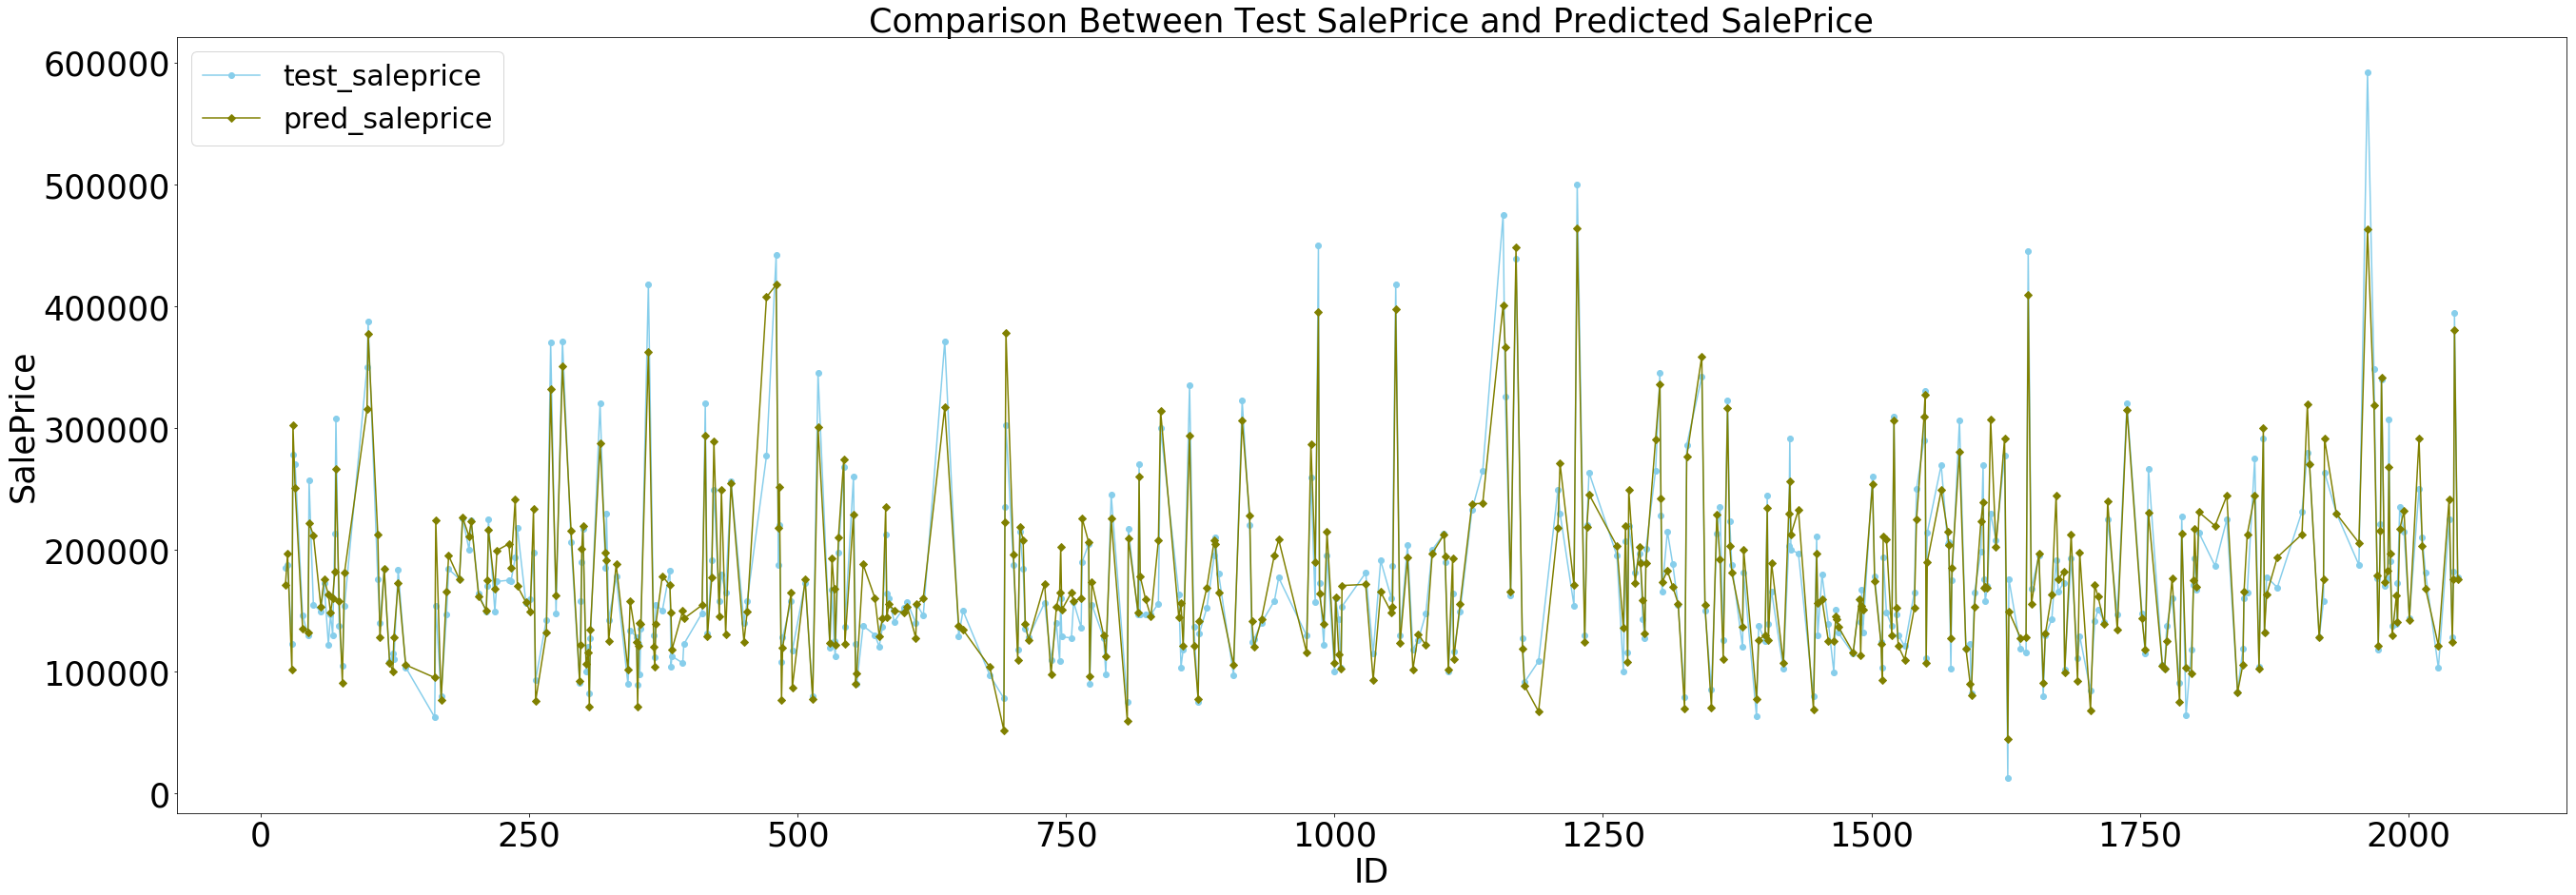

In [172]:
# Plot a lineplot between test data saleprice against predicted saleprice
plt.figure(figsize=(45,15))
plt.plot(model2_line.index, 'test_saleprice', data = model2_line, marker='o', color='skyblue')
plt.plot(model2_line.index, 'pred_saleprice', data = model2_line, marker='D', color='olive')
plt.title(label = "Comparison Between Test SalePrice and Predicted SalePrice", fontsize = 35,)
plt.legend(prop={'size':30})
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.xlabel("ID", fontsize = 35)
plt.ylabel("SalePrice", fontsize = 35)

The blue line in the graph represents the Saleprice for the test data, the green line represents the Saleprice for the predicted values.

From the graph, I can confidently say that this model can predict house prices in Aimes/Iowa pretty well. As you can see, for each ID, which represents a house, the test point and predicted point is quite close to one another, which means the prices do not vary much and can be used to model prices for people who is looking to buy or sell their house. 

Do note that the predicted prices should be used just as a benchmark. Actual price will still be determined by the owners of the house.

**1) Which features appear to add the most value to a home?**

Text(0.5, 1.0, 'Coefficients of Predictors')

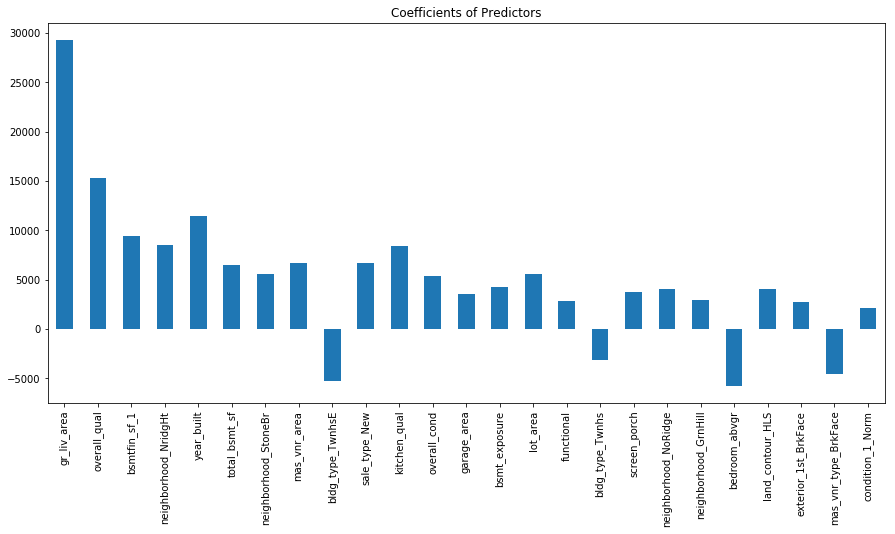

In [175]:
# Barplot to see how each coefficient of the variables relate to the SalesPrice
pd.Series(ridge_new.coef_, index=features_2).plot.bar(figsize=(15, 7))
plt.title('Coefficients of Predictors')

From the Barplot above, the once of the top 3 features that adds the most value to saleprices is the Overall Quality of your house and the year built. 
Through EDA, purchasing a house in a developing part of town might be a good investiment due to the disparity in price between family homes in the top neighborhoods and the other row houses. Lucrative neighborhoods with the highest coefficient are, Northridge Heights, Stone Brook, Northridge and Green Hills.
it's quite funny when the number of bedrooms affects the saleprice 
Some worst features to saleprice is total square foot and well maintained the house is.
Homeowners can increase the value by maintaining the quality and the condition of the house ie Overall Quality, Overall Condition and Kitchen Quality. 
I doubt the feasibility of this training model dataset as the data is focused on Iowa. Data like saleprices, quality and square foot of the sale prices